**B M Nafis Fuad**

**ID: 274502**

# ELE510 Image Processing with robot vision: LAB, Exercise 3, Histogram and point transformations

**Purpose:** *To learn about the image histogram, histogram equalization and image noise.*

The theory for this exercise can be found in chapter 3 of the text book [1]. Supplementary information can found in chapter 1, 2 and 3 in the compendium [2]. See also the following documentations for help:
- [OpenCV](https://docs.opencv.org/4.8.0/d6/d00/tutorial_py_root.html)
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)

**IMPORTANT:** Read the text carefully before starting the work. In
many cases it is necessary to do some preparations before you start the work
on the computer. Read necessary theory and answer the theoretical part
frst. The theoretical and experimental part should be solved individually.
The notebook must be approved by the lecturer or his assistant.

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single pdf file. 
</div>

<div class="alert alert-block alert-info">
    To export the notebook in a pdf format, goes to File -> Download as -> PDF via LaTeX (.pdf).
</div>

**Note regarding the notebook**: The theoretical questions can be answered directly on the notebook using a *Markdown* cell and LaTex commands (if relevant). In alternative, you can attach a scan (or an image) of the answer directly in the cell.

Possible ways to insert an image in the markdown cell:

`![image name]("image_path")`

`<img src="image_path" alt="Alt text" title="Title text" />`


**Under you will find parts of the solution that is already programmed.**

<div class="alert alert-block alert-info">
    <p>You have to fill out code everywhere it is indicated with `...`</p>
    <p>The code section under `######## a)` is answering subproblem a) etc.</p>
</div>

## Problem 1

The histogram for an image of a **black** cilinder and **white** background is $[5600,980,10,0,0,40,11200,80000]$, where 8 gray levels are used. 

The radius of the cilinder is $r = 85\text{mm}$ and the height is $h = 310\text{mm}$. The cilinder is perfectly oriented to only see the lateral area, but not the top or bottom of the cilinder. 

Use this information to find the pixel size, $\Delta x = \Delta y$.

**Describe the steps to arrive to the solution.**

Here,

    Cylinder Radius, r = 85 mm
    Cylinder Height, h = 310 mm
    So, Lateral Area of Cylinder, A = 2*pi*r*h = 2*pi*85*310 mm²

Now, to find the pixel size we can use the following formula,

    A = Number of Pixels on the Cylinder * Δx²
    So, Δx = sqrt(A / Number of Pixels on the Cylinder) 
           = sqrt((2*pi*85*310 mm²) / (5600+980+10+40+11200+80000)) 
           = 1.3 mm

Δx = Δy = 1.3 mm


## Problem 2

For images, such as `./images/christmas.png`, some processing is normally desired to improve the contrast. The simplest approach for doing this is called histogram stretching. For a given image, where the used pixel values range from $g_{\text{min}}$ to $g_{\text{max}}$ we can spread these so they cover the entire $[0, G-1]$ range. The formula for histogram stretching is given by:

\begin{equation*}
	g_{\text{new}} = \left\lfloor {\frac{g_{\text{old}}-g_{\text{min}}}{g_{\text{max}}-g_{\text{min}}}G + 0.5} \right\rfloor
\end{equation*}

Where $g_{\text{old}}$ is an old pixel value, and $g_{\text{new}}$ a new pixel value.

**a)** Make a small Python function, taking an image as input, perform histogram stretching using the previous equation, and giving the increased contrast image as output. Use an 8-bit grayscale range (G=255). Show and explain the result using `./images/christmas.png` as an example. 



In [80]:
# Import the packages
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [81]:
"""
Function that takes in input an image and return the same image stretched.
"""
def histogram_stretch(img):
    G = 255  # Number of gray levels
    g_min = np.min(img)
    g_max = np.max(img)

    # Apply histogram stretching to the entire image
    stretched_img = ((img - g_min) / (g_max - g_min)) * G + 0.5

    # Ensure pixel values are within the 0-255 range
    stretched_img = np.clip(stretched_img, 0, 255)

    return stretched_img.astype(np.uint8)

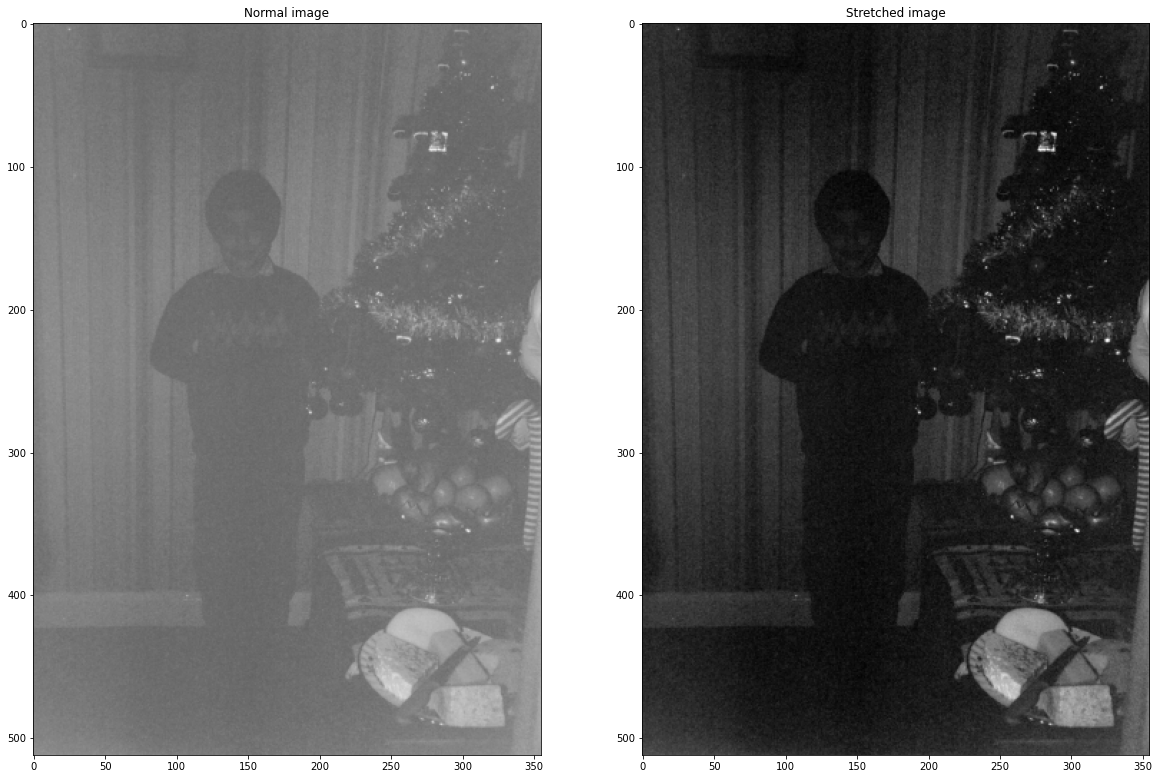

In [82]:
# Read the image and convert it to RGB channels
img = cv2.imread("./images/christmas.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Use the function to improve the contrast of the image
img_stretch = histogram_stretch(img)

plt.figure(figsize=(20,20))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Normal image')
plt.subplot(1, 2, 2)
plt.imshow(img_stretch)
plt.title('Stretched image')
plt.show()



## Problem 3

In this experiment we use **four** images. 
The two first are gray level images, `./images/pout.jpg` and `./images/tire.jpg`. 
The other two are colour images captured with a standard digital camera. 
We want to study image enhancement with histogram equalization. 

*We simplify by using only gray level images*. 
Therefore, the colour images are first read to gray level; a grey level image can be imported using the flag (`cv2.IMREAD_GRAYSCALE`). 
The colour images are `./images/waterfall2.jpg` and `./images/restaurantSpain.jpg`, available from CANVAS.

<details style="margin-top:20px">
    <summary>
        <font size="2" color="green"><b>Click here for optional hints</b></font>
    </summary>
    <p>1. Make a Python function or script that do histogram equalization <code>cv2.equalizeHist</code>, </p>
    <p>2. computes the histograms <code>plt.hist</code> for both the input image and the output image, </p>
    <p>3. and displays both images with histograms in the same figure (use <code>plt.figure</code> and <code>plt.subplot</code>).</p>
</details>


**a)** Use Python and find the histograms for the images. Plot the normalized cumulative distribution function (CDF) over the histogram.

**b)** (Part-01) Perform histogram equalization of these images and find the new histograms.  Plot the normalized CDF over the new histogram.


In [83]:
# Define a function for histogram equalization and visualization
def histogram_equalization(img_path):
    # Read the input image in grayscale
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Perform histogram equalization
    equalized_img = cv2.equalizeHist(img)

    # Compute histograms for the input and output images
    hist_input = cv2.calcHist([img], [0], None, [256], [0, 256])
    hist_output = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])

    # Normalize the histograms
    hist_input /= hist_input.sum()
    hist_output /= hist_output.sum()

    # Compute the cumulative distribution functions (CDFs)
    cdf_input = np.cumsum(hist_input)
    cdf_output = np.cumsum(hist_output)

    # Plot the input and output images with their histograms and CDFs
    plt.figure(figsize=(18, 10))

    # Input image
    plt.subplot(2, 3, 1)
    plt.imshow(img, cmap='gray')
    plt.title('Input Image')
    
    # Input Histogram
    plt.subplot(2, 3, 2)
    plt.hist(img.flatten(),256,[0,256])
    plt.title('Input Histogram')

    # Input CDF
    plt.subplot(2, 3, 3)
    plt.plot(cdf_input, color='blue', label='Input CDF')
    plt.title('Input CDFs')

    # Equalized image
    plt.subplot(2, 3, 4)
    plt.imshow(equalized_img, cmap='gray')
    plt.title('Equalized Image')

    # Equalized histogram
    plt.subplot(2, 3, 5)
    plt.hist(equalized_img.flatten(),256,[0,256])
    plt.title('Equalized Histogram')

    # Equalized CDFs
    plt.subplot(2, 3, 6)
    plt.plot(cdf_output, color='red', label='Equalized CDF')
    plt.title('Equalized CDFs')

    plt.tight_layout()
    plt.show()

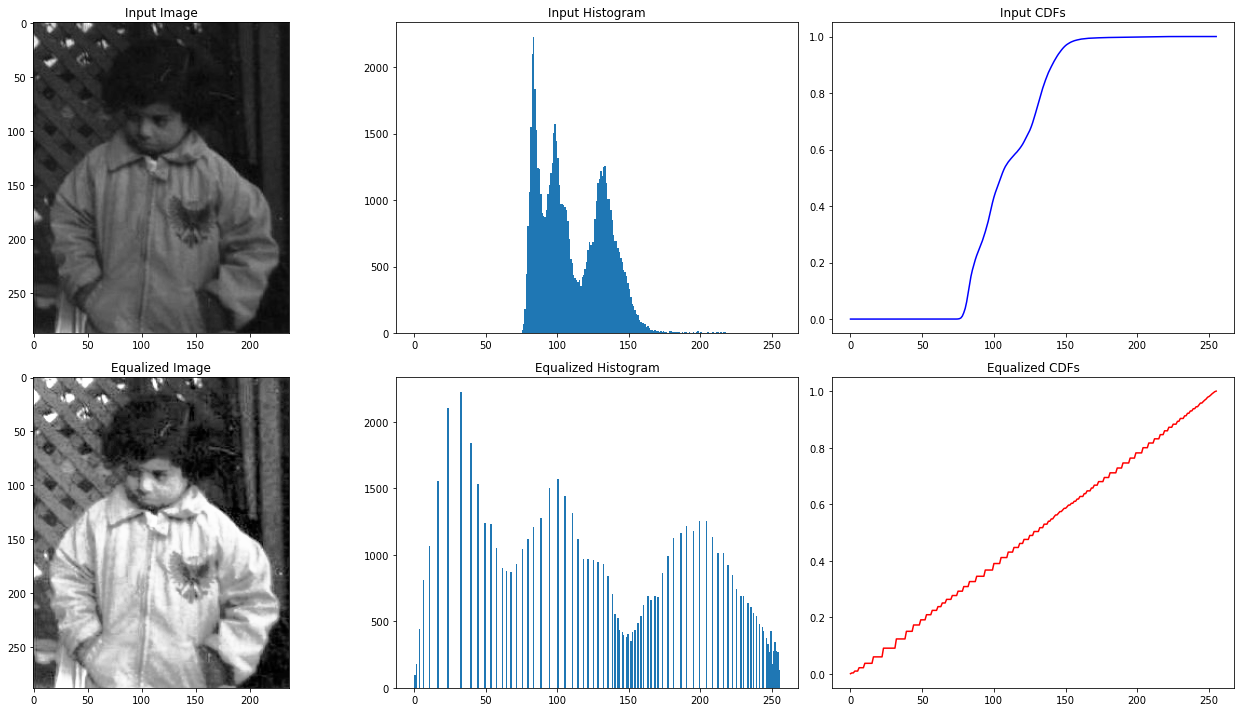

In [84]:
histogram_equalization('./images/pout.jpg')

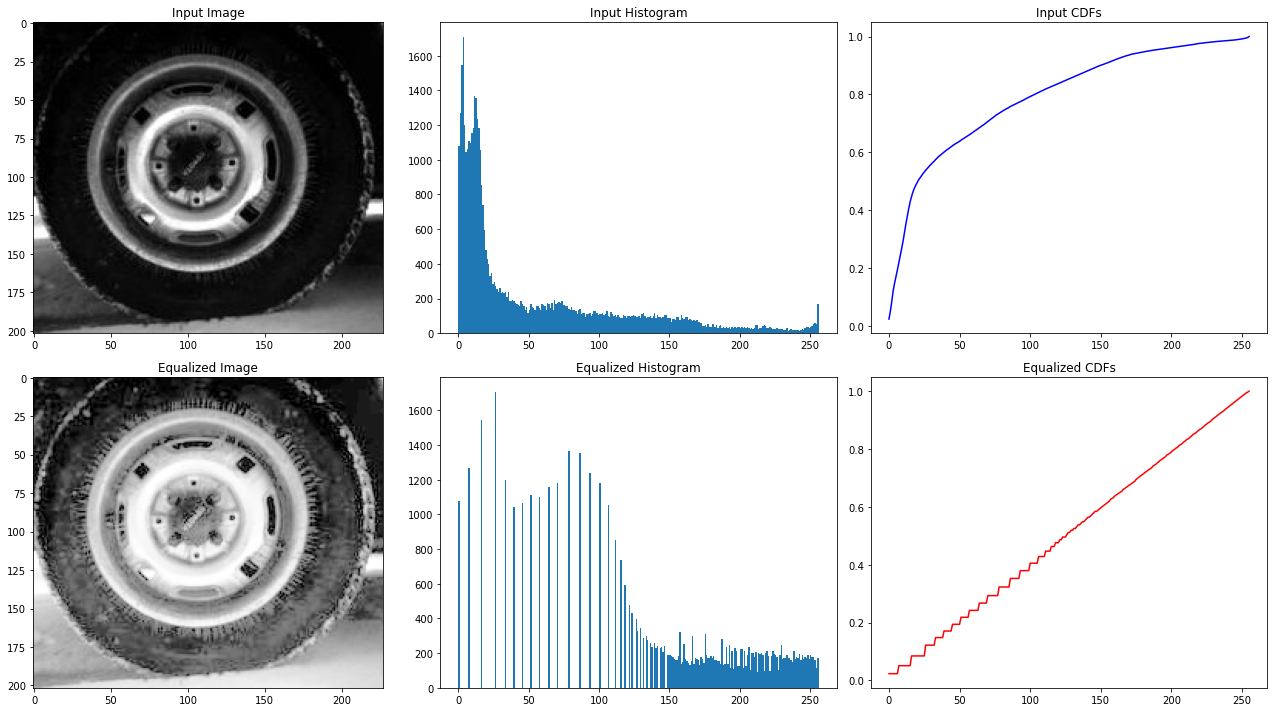

In [85]:
histogram_equalization('./images/tire.jpg')

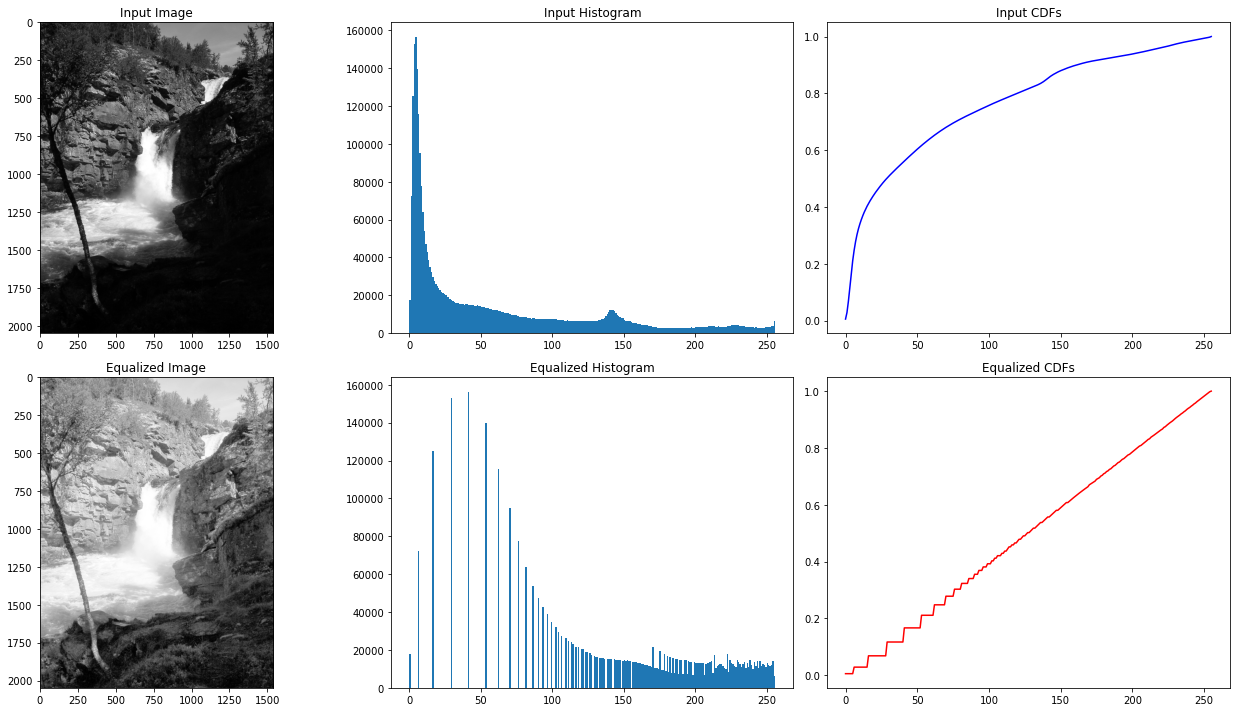

In [86]:
histogram_equalization('./images/waterfall2.jpg')

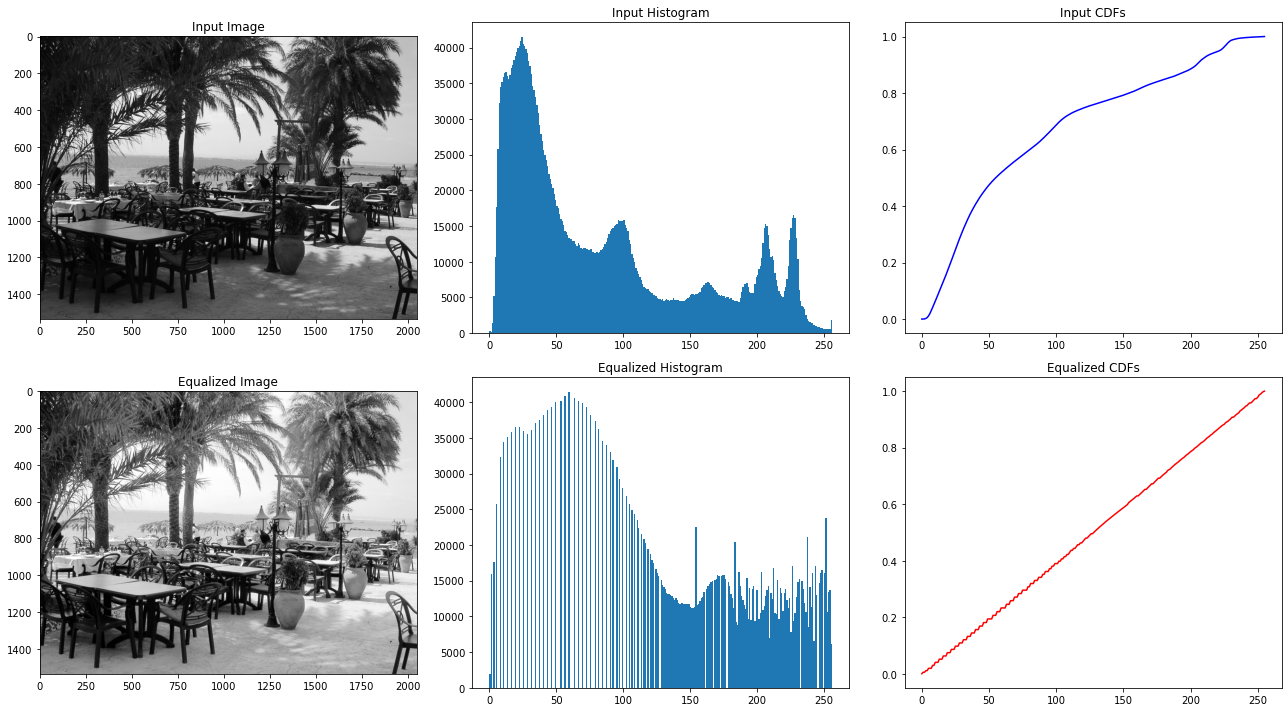

In [87]:
histogram_equalization('./images/restaurantSpain.jpg')


**b)** (Part-02) Discuss the effect of the equalization over the histogram and its CDF.


After applying histogram equalization, the histogram is transformed in such a way that it spreads the pixel values more evenly across the entire available intensity range (typically 0 to 255 for 8-bit images). The transformation stretches and redistributes the pixel values, making the histogram more uniform. This leads to an increase in the number of pixels with intermediate intensity values, improving the contrast.

After histogram equalization, the CDF of the equalized image becomes approximately linear. This means that the pixel values are distributed more uniformly across the entire intensity range. As a result, areas of the image that were originally low in contrast will experience a more significant change in pixel values, while areas that were originally high in contrast may see a less significant change. This linearity in the CDF indicates improved contrast throughout the image.


**c)** Explain why the discrete histogram equalization usually do not give a completely flat histogram.

In digital images, pixel values are inherently discrete and quantized. For example, in an 8-bit image, pixel values can range from 0 to 255. Histogram equalization attempts to redistribute these discrete pixel values to achieve a more uniform distribution. However, due to the discrete nature of pixel values, achieving a perfectly flat histogram is often impossible.

Aggressively equalizing the histogram to achieve a perfectly flat distribution can lead to a loss of image information. This can result in an image that looks unnatural and may not accurately represent the original scene.


## Problem 4

Noise is a common problem in digital images. 
In this problem we want to study estimation of camera noise. 
We have a set of $K$ images. 
The only difference between the images is the noise value at each pixel. 

Assume that the noise is additive and uncorrelated with the gray values of the image such that for each image we have:
$g_{k} = f + \eta_{k},\, k = 1, 2, \;\cdots\;,K$, where $g_{k}$ is the $k$-th image with noise $\eta_{k}$. 

The image without noise, $f$, is unchanged (here we have not shown the indexes $(x,y)$). 
The mean image is given by the average value:

\begin{equation}
    \overline{g(x,y)} = \frac{1}{K}\sum_{k = 1}^{K}g_{k}(x,y).
\end{equation}

Then it can be shown that
\begin{equation}\label{exc2-eq2}
    E\{\overline{g(x,y)}\} = f(x,y)
\end{equation}

and

\begin{equation}\label{exc2-eq3}
    \sigma^{2}_{\overline{g(x,y)}} =
    \frac{1}{K}\;\sigma^{2}_{\eta(x,y)}.
\end{equation}


**a)** Show how to derive these two results using the first equation and the information given in the text.


![Alt text](Problem04Part01.jpg "Problem 04")

![Alt text](Problem04Part02.jpg "Problem 04")

## 
### Delivery (dead line) on CANVAS: 22.09.2023 at 23:59


## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no


### Teaching assistant
Saul Fuster Navarro, room E-401
E-mail: saul.fusternavarro@uis.no


Jorge Garcia Torres Fernandez, room E-401
E-mail: jorge.garcia-torres@uis.no


## References

[1] S. Birchfeld, Image Processing and Analysis. Cengage Learning, 2016.

[2] I. Austvoll, "Machine/robot vision part I," University of Stavanger, 2018. Compendium, CANVAS.